In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Dense, Flatten

In [17]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os,cv2

import warnings
warnings.filterwarnings("ignore")

data_path = r'E:\dataset'

labels=[]
for folder in os.listdir(data_path):
    labels.append(folder)
labels.sort() #len = 107
labels = labels[0:13] #len =13


In [18]:
train_images=[]
train_labels=[]

for i,folder in enumerate(labels):
    try:
        for image in os.listdir(data_path+'/'+folder):
            img = os.path.join(data_path+'/'+folder+'/'+image)
            img = cv2.imread(img)
            img = cv2.resize(img,(256,256))
            train_images.append(img)
            train_labels.append(i)
    except:
        print(i,folder,image,img)
train_images = np.asarray(train_images)
train_labels = np.asarray(train_labels).astype('int64')

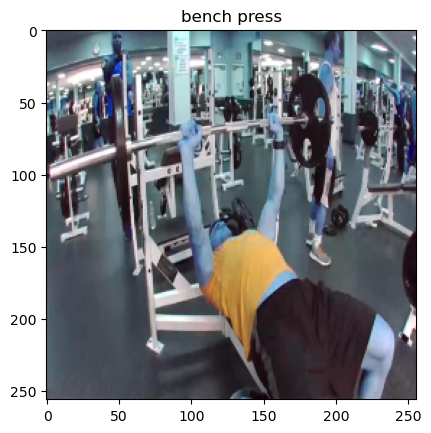

In [4]:
import matplotlib.pyplot as plt
plt.imshow(train_images[2])
plt.title(labels[train_labels[0]])
plt.show()

In [9]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels, 13)

In [11]:
print(f'After preprocessing, our dataset has {train_images.shape[0]} images with shape {train_images.shape[1:]}')
print(f'After preprocessing, our dataset has {train_labels.shape[0]} rows with {train_labels.shape[1]} labels')

After preprocessing, our dataset has 142 images with shape (256, 256, 3)
After preprocessing, our dataset has 142 rows with 13 labels


In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train_images,train_labels,test_size=0.1,shuffle=True)

In [14]:
print(f'After spiltting, shape of our train dataset: {X_train.shape}')
print(f'After spiltting, shape of our test dataset: {X_test.shape}')

After spiltting, shape of our train dataset: (127, 256, 256, 3)
After spiltting, shape of our test dataset: (15, 256, 256, 3)


In [15]:
import tensorflow.keras.backend  as K
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,\
            Dropout,Rescaling,Dense,Flatten,Activation,BatchNormalization
from tensorflow.keras.models import load_model

In [19]:
K.clear_session()
model = tf.keras.models.Sequential([
            tf.keras.Input(shape=(256,256,3)),
            
            tf.keras.layers.RandomFlip("horizontal"),
            tf.keras.layers.RandomRotation(0.1),
            Rescaling(1.0 / 255),
            
            Conv2D(32,(3,3),activation='relu'),
            MaxPooling2D((2,2)),  
            Dropout(0.3),

            Conv2D(64,(3,3),activation='relu'),
            MaxPooling2D((2,2)),    
            Dropout(0.3),
            
            Conv2D(64,(3,3),activation='relu'),
            MaxPooling2D((2,2)),
            Dropout(0.5),
            
            Flatten(),
            Dense(512,activation='relu'),
            Dense(128,activation='relu'),    
            Dense(13,activation='softmax')
        
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 256, 256, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    29,491,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 13)             │         1,677 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,615,373 (112.97 MB)

 Trainable params: 29,615,373 (112.97 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
            )

history_model = model.fit(X_train, y_train,
          batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 711ms/step - accuracy: 0.0932 - loss: 4.4492 - val_accuracy: 0.3077 - val_loss: 2.1525
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 566ms/step - accuracy: 0.1927 - loss: 2.5189 - val_accuracy: 0.1154 - val_loss: 2.5091
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 547ms/step - accuracy: 0.2119 - loss: 2.2028 - val_accuracy: 0.2308 - val_loss: 1.9764
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 572ms/step - accuracy: 0.2511 - loss: 1.8266 - val_accuracy: 0.2308 - val_loss: 1.7483
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 631ms/step - accuracy: 0.2917 - loss: 1.6197 - val_accuracy: 0.2308 - val_loss: 1.7400
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 540ms/step - accuracy: 0.3315 - loss: 1.6128 - val_accuracy: 0.3846 - val_loss: 1.6995
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 650ms/step - accuracy: 0.3340 - loss: 1.5746 - val_accuracy: 0.3462 - val_loss: 1.5744
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 577ms/step - accuracy: 0.3265 - loss: 1.4527 - val_accuracy: 0.2308 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


3

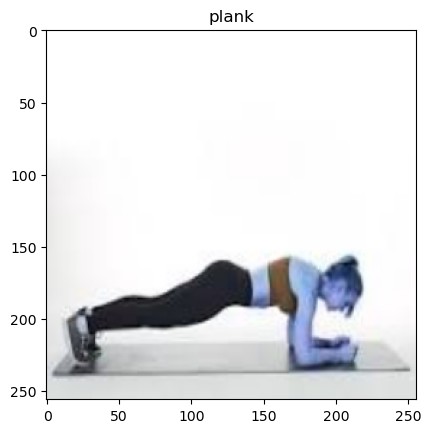

In [235]:
test_img = cv2.imread(r'E:\squat.jpeg')
test_img = cv2.resize(test_img,(256,256))
test_img1 = np.asarray(test_img)
test_img = test_img1.reshape(-1,256,256,3)
p = model.predict(test_img)

plt.imshow(test_img1)
plt.title(labels[np.argmax(p)])
np.argmax(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[3.8584962e-02 4.2448230e-03 2.0608223e-04 3.0944559e-01 6.4751732e-01
  5.9194636e-09 2.0325410e-07 6.5071298e-08 2.2433545e-08 9.3884253e-08
  7.7646439e-07 3.7912198e-08 7.4838740e-09]]


4

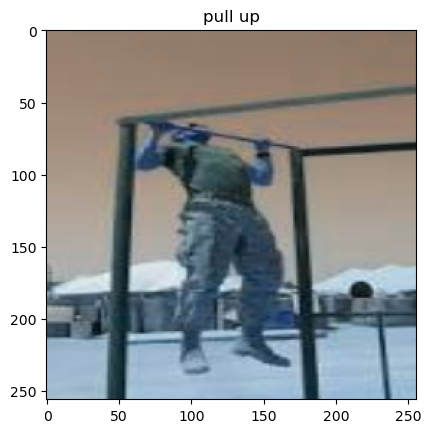

In [237]:
test_img = cv2.imread(r'E:\pull.jpeg')
test_img = cv2.resize(test_img,(256,256))
test_img1 = np.asarray(test_img)
test_img = test_img1.reshape(-1,256,256,3)
p = model.predict(test_img)
print(p)
plt.imshow(test_img1)
plt.title(labels[np.argmax(p)])
np.argmax(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[4.6980757e-02 5.1915646e-01 3.1798940e-02 8.3300835e-03 3.9373007e-01
  4.9531826e-07 3.4660499e-07 2.4961449e-07 3.6312397e-07 1.7004741e-07
  1.5729325e-06 3.6212970e-07 6.5371935e-08]]


1

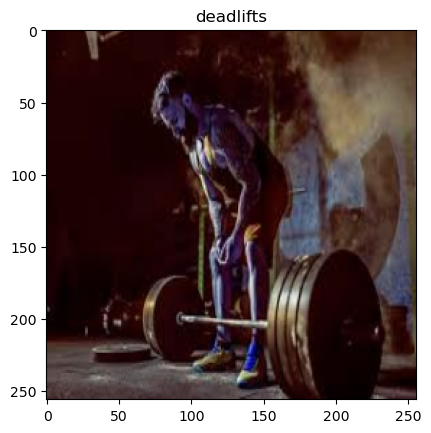

In [239]:
test_img = cv2.imread(r'E:\dead.jpeg')
test_img = cv2.resize(test_img,(256,256))
test_img1 = np.asarray(test_img)
test_img = test_img1.reshape(-1,256,256,3)
p = model.predict(test_img)
print(p)
plt.imshow(test_img1)
plt.title(labels[np.argmax(p)])
np.argmax(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[8.7830001e-01 1.9926842e-05 4.8397891e-02 4.1561943e-06 7.3278032e-02
  8.7560591e-11 7.5574158e-11 2.5296490e-12 4.1671736e-11 2.8611708e-11
  4.8961890e-10 3.9339617e-12 2.2911174e-12]]


0

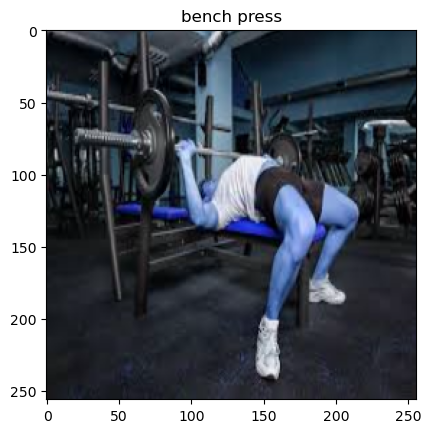

In [255]:
test_img = cv2.imread(r'E:\bench.jpeg')
test_img = cv2.resize(test_img,(256,256))
test_img1 = np.asarray(test_img)
test_img = test_img1.reshape(-1,256,256,3)
p = model.predict(test_img)
print(p)
plt.imshow(test_img1)
plt.title(labels[np.argmax(p)])
np.argmax(p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[9.6804596e-04 7.1558831e-03 9.5575434e-01 9.1737317e-04 3.5203632e-02
  2.7448965e-07 9.1411380e-08 7.6613249e-09 7.2630144e-08 6.0997841e-08
  1.5541832e-07 3.2198646e-08 1.3002855e-08]]


2

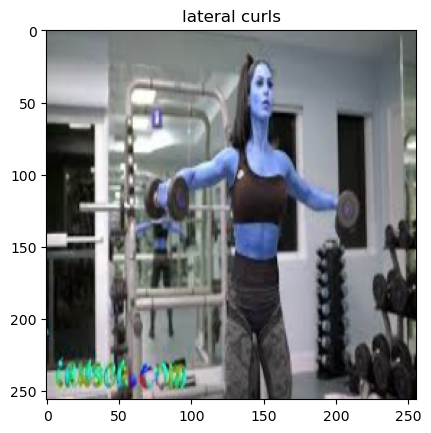

In [249]:
test_img = cv2.imread(r'E:\lat.jpeg')
test_img = cv2.resize(test_img,(256,256))
test_img1 = np.asarray(test_img)
test_img = test_img1.reshape(-1,256,256,3)
p = model.predict(test_img)
print(p)
plt.imshow(test_img1)
plt.title(labels[np.argmax(p)])
np.argmax(p)

In [25]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 1.3744356632232666
Test accuracy: 0.6666666865348816


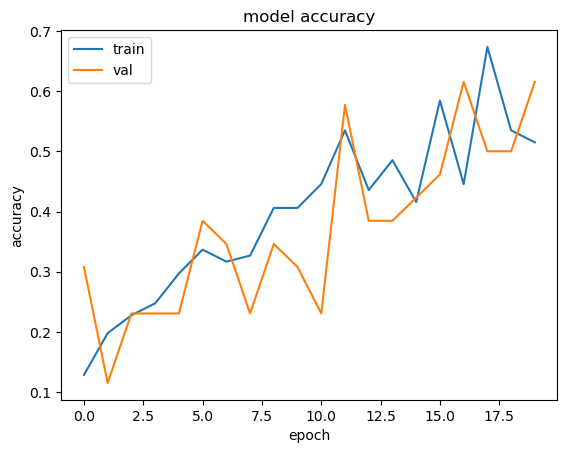

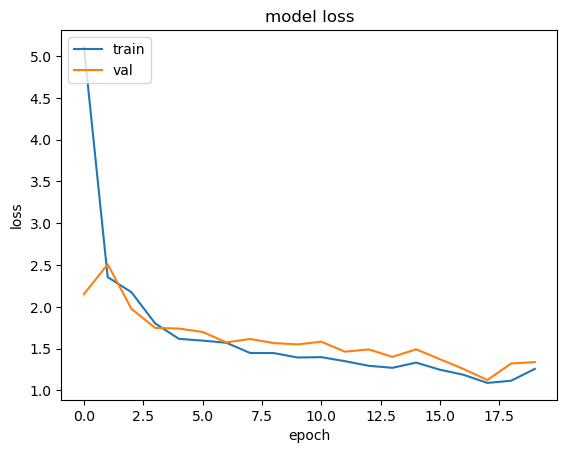

In [27]:
plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()